# Step8 演習02 ニューラルネットワークの学習
---

ニューラルネットワークで分類問題を解くためには、各ニューロンを結合する重みやバイアスといったパラメータを求める必要があります。

このパラメータを求めるプロセスを「学習」と呼びます。

Step8 演習01では既知のものとして与えられていたパラメータを、scikit-learn の MLPClassifierを用いてこれらの係数を求めてみましょう。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- scikit-learn の MLPClassifierを使ってニューラルネットワークのモデルを構築する。
- 構築したニューラルネットワークから学習後のパラメータを取り出して、中身を確認・利用する。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [NumPy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [Matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [scikit-learn](http://scikit-learn.org/stable/index.html) Pythonのオープンソース機械学習ライブラリの公式ドキュメント

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

** 注意： **初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

## 線形分離不可能なデータセット

Step8 演習01でも取り扱った線形分離不可能なデータセットの例としてXNORを使います。

<table style="width:30%">

	<thead>
	<tr>
		<th >入力$X_1$</th>
		<th >入力$X_2$</th>
		<th >出力$y$</th>
	</tr>
	</thead>

  <tr>
    <td>0</td>
    <td> 0 </td> 
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td>1</td>
    <td> 1 </td> 
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td>0</td>
    <td> 1 </td> 
    <td> 0 </td> 
  </tr>
 
     <tr>
    <td>1</td>
    <td> 0 </td> 
    <td> 0 </td> 
  </tr>
  
</table>

In [2]:
x = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([1, 1, 0, 0])
X_train, X_test = x, x  #訓練データとテストデータ
y_train, y_test = y, y  #訓練データとテストデータの正解

In [3]:
X_train

array([[0, 0],
       [1, 1],
       [1, 0],
       [0, 1]])

In [4]:
y_train

array([1, 1, 0, 0])

## ニューラルネットワークのモデル

下記の条件で、ニューラルネットワークのモデルを構築します：

- 入力層のニューロン数 ２個
- 隠れ層のニューロン数 ２個
- 出力層のニューロン数 １個

**出力が１つ**のニューラルネットワークモデルとします。

ここではニューラルネットワークのモデルを構築するのにscikit-learnの「MLPClassifier」を利用します。

「MLPClassifier」はStep4 演習05でも利用したことを思い出しましょう。

- [sklearn.neural_network.MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

MLPClassifier には多くの引数が用意されています。詳細は公式ドキュメントを参考にしてください。

上で定義したニューラルネットワークのモデルのコードは下のセルのコードブロックのように記述できます。

下のセルを実行すると次のテキストが出力されます。

- Training set score: 1.000000
- Test set score: 1.000000

**各スコアが1にならない場合は、スコアが1になるまで何度かセルを実行してみてみてください。**

Training set score: 0.750000
Test set score: 0.750000


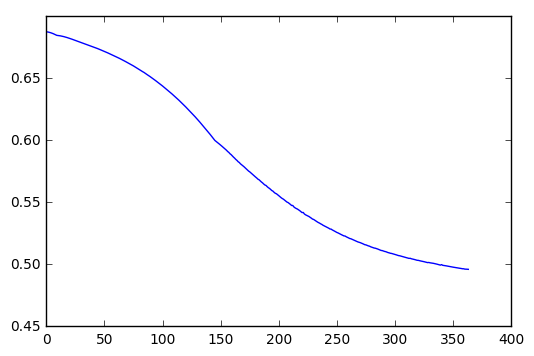

In [5]:
#ニューラルネットワークのインスタンスを作成
mlp = MLPClassifier(hidden_layer_sizes=(2), #隠れ層のユニット数
                    activation='relu',  #隠れ層の活性化関数はReLU
                    max_iter=10000,  #学習回数
                    alpha=0, #L2正則化パラメータ
                    solver='sgd',# 学習アルゴリズム（確率的勾配降下法）
                    verbose=0, #学習ログの表示 ０を１に変更すると表示されます 
                    learning_rate_init=0.01)#学習率

#作成したインスタンスを使って学習
#引数に訓練データと正解ラベルを渡す
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

plt.plot(mlp.loss_curve_) 
plt.show()

**「Training set score」と「Test set score」の出力がそれぞれ「１」**になったことを確認したら次へ進んでください。

## 学習で獲得したパラメータを使ってみよう

学習の結果手に入った係数は「 mlp.coefs\_ 」、バイアスは「 mlp.intercepts_ 」に格納されています。

獲得したパラメータを用いてフォワードプロバゲーションを実行すると、出力結果が期待通りになっていることを確認しましょう。

つまり、入力 $x$ が [0, 0] や [1, 1] である場合は出力は「１」に近く、[0, 1] や [1, 0] である場合、 出力が「０」に近いとうことを確認します。

### 重み $w$ とバイアス $b$ を確認してみる

重み $w$ バイアス $b$ の各パラメータの中身を確認してみましょう。
- 重み$w$：mlp.coefs_
- バイアス$b$：mlp.intercepts_

In [6]:
#入力層と隠れ層の間の重みw1
mlp.coefs_[0]

array([[-0.16989483,  1.54487997],
       [ 0.57515367, -1.54939839]])

In [7]:
#入力層と隠れ層の間のバイアスb1
mlp.intercepts_[0]

array([-0.84114283, -0.0064463 ])

In [8]:
#隠れ層と出力層の間の重みw2
mlp.coefs_[1]

array([[-1.15838371],
       [-2.09117987]])

In [9]:
#隠れ層と出力層の間のバイアスb2
mlp.intercepts_[1]

array([0.54462887])

いま確認したパラメータは下記の図の $w_1,b_1,w_2,b_2$ に対応しています。

<div align="center"  style="width:75%">
<img src="./dataStep8/forward_prop.png"></div>

## 活性化関数

次にニューラルネットワークで使う活性化関数の準備をします。

** 【課題３】 ** ReLU関数の出力を返す関数 relu(x) を実装してください。

**Note：** ReLU関数の定義です。
$$g(x)=\max\{0,x\}$$

ReLU関数は入力が正のときその値をそのまま出力し、入力が負のときゼロを出力する関数です。

In [10]:
#Coursemale-02 Step8 QuestionNumber3 d9ef667d390051eafe12574f0d85aaf3
def relu(x):
###############ここを穴埋めしてください###############
    y = np.maximum(0, x)
######################################################
    return y

** 左上の保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [11]:
%%bash
./validation_client.py male-02 8 3 Step8_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



** 【課題４】 ** シグモイド関数の出力を返す関数 sigmoid(x) を実装してください。

**Note:**
シグモイド関数の定義です。

$$\sigma{(x)}=\frac{1}{1+e^{-x}}$$

In [12]:
#Coursemale-02 Step8 QuestionNumber4 1e04a015dc13cdf0a4b1acb1d53603db
def sigmoid(x):
###############ここを穴埋めしてください###############
    y = 1 / (1 + np.exp(-x))
######################################################
    return y

** 左上の保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [13]:
%%bash
./validation_client.py male-02 8 4 Step8_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



## フォワードプロパゲーション

次のセルには上の画像の通りに構築したニューラルネットワークのモデルコードを書いています。

ここでは入力データを[1, 1]としています。

**このときの期待される出力はどのような値**なのか考えた上で次のセルを実行してみてください。

In [14]:
W1 = mlp.coefs_[0]
b1 = mlp.intercepts_[0]
W2 = mlp.coefs_[1]
b2 = mlp.intercepts_[1]

#　フォワードプロパゲーション
#入力
x = np.array([1, 1]) #[0, 0], [1, 1], [1, 0], [0, 1]

#隠れ層
layer1_z = np.dot(x, W1) + b1
layer1_a = relu(layer1_z) # relu Activation
#出力
layer2_z = np.dot(layer1_a, W2) + b2
layer2_a = sigmoid(layer2_z) # sigmoid

print(layer2_a)

[0.63288855]


上記コードのように入力 $x$ を１づつニューラルネットワークに与えるのではなく、下記のように **$x$ の値をまとめて入力して、結果をまとめて手に入れる**こともできます。

In [15]:
W1 = mlp.coefs_[0]
b1 = mlp.intercepts_[0]
W2 = mlp.coefs_[1]
b2 = mlp.intercepts_[1]

#　フォワードプロパゲーション
#入力をまとめて与える
x = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])

#隠れ層
layer1_z = np.dot(x, W1) + b1
layer1_a = relu(layer1_z)          # relu Activation

#出力
layer2_z = np.dot(layer1_a, W2) + b2
layer2_a = sigmoid(layer2_z)       # sigmoid

print(layer2_a)

[[0.63288855]
 [0.63288855]
 [0.06461494]
 [0.63288855]]


出力の最初の２つが１に近く、残りの２つがゼロに近ければ、ニューラルネットワークでは想定していた分類結果である $y = [1,1,0,0]$ を予測できたことになります。

改めて下の表で入力とそのときの出力の関係を確認してみましょう。

<table style="width:30%">

	<thead>
	<tr>
		<th >入力$X_1$</th>
		<th >入力$X_2$</th>
		<th >出力$y$</th>
	</tr>
	</thead>

  <tr>
    <td>0</td>
    <td> 0 </td> 
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td>0</td>
    <td> 1 </td> 
    <td> 0 </td> 
  </tr>
  
    <tr>
    <td>1</td>
    <td> 0 </td> 
    <td> 0 </td> 
  </tr>
 
     <tr>
    <td>1</td>
    <td> 1 </td> 
    <td> 1 </td> 
  </tr>
  
</table>

さて、これまでは出力層のニューロンの数を「１」として解きましたが、出力層のニューロンの数を増やしたモデル、マルチクラス分類問題について考えていきたいと思います。

## マルチクラス問題として解いてみよう

上記の方法では出力を１つ（値を１つ）だけ用意して、その結果が「０に近いか1に近いか」という確率の問題として解きました。

同じ問題を出力を２つ（値を２つ）用意することで、マルチクラス問題として解くことができます。

たとえば、正解が1の場合は[1, 0] という２つの数値を出力し、正解が0の場合は [0, 1]という２つの数値を出力するように学習すれば、先ほどの１つの出力だけで解いていた問題を解くことができるわけです。

この考え方は２値分類問題を解くだけでなく、マルチクラス問題（複数のクラスを分類する問題）を解くときにも利用できます。

つまり、複数の出力（数値）を用いれば、マルチクラス問題を解くことができるわけです。

たとえば、下図のように各出力を分類対象となるクラスに対応させてマルチクラス問題を解きます：
<br>
<br>

<div align="center"  style="width:75%">
<img src="./dataStep8/mulchclass_01.png"></div>

一方、 このように出力を複数用意してしまうと、そのままでは出力を確率解釈できません。

ロジステック回帰でシグモイド関数を使って出力を確率として扱えるようになったのと同様、少し工夫することで出力を確率とみなすことができるようになります。

具体的には下記のようにsoftmax関数を利用します。

<div align="center"  style="width:65%">
<img src="./dataStep8/softmax.png"></div>

softmaxは数式から分かるように簡単に計算できます。

各出力値をexpの肩に乗せた値をすべて合計し、それを分母にします。

特定の出力をexpの肩に乗せた値を分子にして分母で割ったものは、その出力が全体のどの程度の割合になっているのかということを表現しているので、これは確率として解釈できます。

したがって、ニューラルネットワークの最終段でsoftmax関数を使うことにより、各出力を確率解釈できる値が入手できるわけです。


** 【課題５】 ** softmax関数の出力を返す関数 softmax(x) を実装してください。ここでは、マルチクラス問題として複数のデータを扱うので行成分ごとにsoftmax関数を適用させます。詳しくは採点実行セル下の出力結果を確認してください。

**Note:**
softmax関数の定義です。

$${\rm softmax}(x)_{i}=\frac{e^{x_i}}{\displaystyle\sum_{j=1}^{n}e^{x_j}}　(i=1,2,\ldots,n)$$

In [16]:
#Coursemale-02 Step8 QuestionNumber5 a16a4a75003fb1370b56733d52cd18a5
def softmax(x):
###############ここを穴埋めしてください###############
    exp_x = np.exp(x)
    y = exp_x / np.sum(exp_x, axis=1, keepdims=True)
######################################################
    return y

** 左上の保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [17]:
%%bash
./validation_client.py male-02 8 5 Step8_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



ソフトマックス関数に与える「x」はベクトルです。このベクトルの各値を確率解釈できる値に変えてくれるわけです。

具体的な値を与えて試してみましょう。また、出力された値を合計すると「１」になることも分かります。

In [18]:
a = np.array([[6, 2, 3], [1, 2, 3]]) #サンプルデータ
print('softmax:\n', softmax(a))
print('softmaxの出力をすべて合計:\n', np.sum(softmax(a)))
print('softmaxの出力を行方向ごとに合計 (axis=1):\n', np.sum(softmax(a), axis=1))

softmax:
 [[0.93623955 0.01714783 0.04661262]
 [0.09003057 0.24472847 0.66524096]]
softmaxの出力をすべて合計:
 2.0
softmaxの出力を行方向ごとに合計 (axis=1):
 [1. 1.]


**Expected Output**: <br>
softmax:<br>
 [[0.93623955 0.01714783 0.04661262]<br>
 [0.09003057 0.24472847 0.66524096]]<br>
softmaxの出力をすべて合計:<br>
 2.0<br>
softmaxの出力を行方向ごとに合計 (axis=1):<br>
 [1. 1.]

### ２値分類問題をマルチクラス問題として解いてみよう

下記のコードブロックを実行し、実際に２値分類問題が解けることを確認して見ましょう。

下のセルを実行すると次のテキストが出力されます。

- Training set score: 1.000000
- Test set score: 1.000000

**各スコアが1にならない場合は、スコアが1になるまで何度かセルを実行してみてみてください。**

Training set score: 0.000000
Test set score: 0.000000


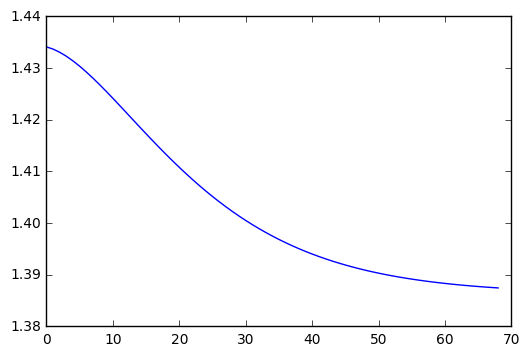

In [19]:
x = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])
X_train, X_test = x, x
y_train, y_test = y, y

#ニューラルネットワークのインスタンスを作成
mlp = MLPClassifier(hidden_layer_sizes=(2),
                    activation='relu',
                    max_iter=10000,
                    alpha=0,
                    solver='sgd',
                    verbose=0,
                    learning_rate_init=0.01)

#作成したインスタンスを使って学習
#引数に訓練データと正解ラベルを渡す
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

plt.plot(mlp.loss_curve_)
plt.show()

**「Training set score」と「Test set score」の出力がそれぞれ「１」**になったことを確認したら次のセルを実行し、出力を確認しましょう。

** 出力層の活性化関数としてsoftmax関数を利用します。 **

In [20]:
W1 = mlp.coefs_[0]
b1 = mlp.intercepts_[0]
W2 = mlp.coefs_[1]
b2 = mlp.intercepts_[1]

#　フォワードプロパゲーション
#入力
x = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])

#隠れ層
layer1_z = np.dot(x, W1) + b1
layer1_a = relu(layer1_z)          # relu Activation

#出力
layer2_z = np.dot(layer1_a, W2) + b2
layer2_a = softmax(layer2_z) # softmax

print(layer2_a)

[[0.51847667 0.48152333]
 [0.51847667 0.48152333]
 [0.51847667 0.48152333]
 [0.51847667 0.48152333]]


出力の最初の２つが[１, 0]に近く、残りの２つが[0, 1]に近ければ、想定していた分類結果である $y = [1, 0], [1, 0], [0, 1], [0, 1]$ を予測できたことになります。

<div align="center"  style="width:25%">
<img src="./dataStep8/id_od_01.png"></div>

## 学習結果の可視化

もともとのxの入力が２次元でどのようにマップされているのか確認し、

その後、ニューラルネットワークを通した結果どのようにマップが変化したのか視覚的に確認してみましょう。

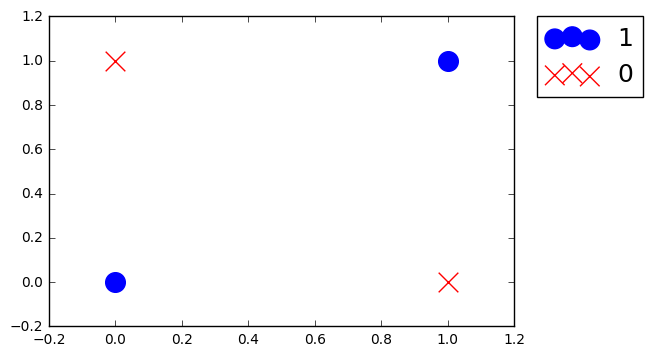

In [21]:
plt.scatter(x[0][0], x[0][1], s=200, color='blue',  marker='o', label='1')
plt.scatter(x[1][0], x[1][1], s=200, color='blue', marker='o')
plt.scatter(x[2][0], x[2][1], s=200, color='red', marker='x',  label='0')
plt.scatter(x[3][0], x[3][1], s=200, color='red', marker='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.show()

入力xは線形分離不可能な状態であることが確認できます。

下記のコードを実行し、ニューラルネットワークを通した結果（ニューラルネットワークの出力）がどのようにマップされているのか確認してみましょう。

赤のXと青の●が直線で分離できるようにマップされていることを確認しましょう。

このように、線形分離できるように入力をマッピングし直すのがニューラルネットワークの働きだとみなすことができます。

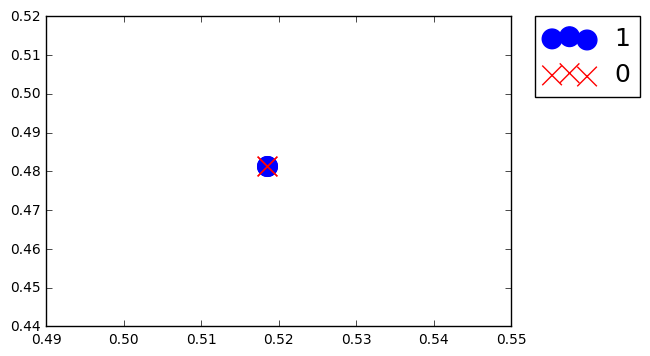

In [22]:
plt.scatter(layer2_a[0][0], layer2_a[0][1], s=200, color='blue',  marker='o', label='1')
plt.scatter(layer2_a[1][0], layer2_a[1][1], s=200, color='blue', marker='o')
plt.scatter(layer2_a[2][0], layer2_a[2][1], s=200, color='red', marker='x',  label='0')
plt.scatter(layer2_a[3][0], layer2_a[3][1], s=200, color='red', marker='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.show()

隠れ層の出力（layer1_a）の状態がどのようになっているのかも一緒に確認しておきましょう。

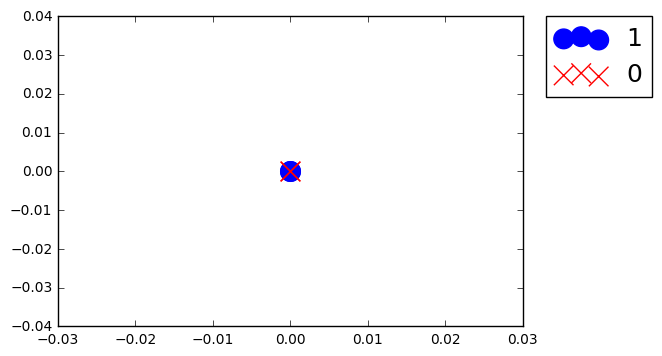

In [23]:
plt.scatter(layer1_a[0][0], layer1_a[0][1], s=200, color='blue',  marker='o', label='1')
plt.scatter(layer1_a[1][0], layer1_a[1][1], s=200, color='blue', marker='o')
plt.scatter(layer1_a[2][0], layer1_a[2][1], s=200, color='red', marker='x',  label='0')
plt.scatter(layer1_a[3][0], layer1_a[3][1], s=200, color='red', marker='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.show()

## 隠れ層のニューロンの数を増やす（次元を上げる）
計算量は増しますが、隠れ層の次元を上げればそれだけ入力xを線形分離しやすい場所にマッピングする自由度が上がり分離性能がしやすくなるはずです。

ただし、ニューラルネットワークの目的関数は凸関数ではないため、局所解に陥ってしまう可能性があるので必ず上手くいくとは限りません。

下記のように、隠れ層のニューロンの数を３つにして実行してみましょう。

下のセルを実行すると次のテキストが出力されます。

- Training set score: 1.000000
- Test set score: 1.000000

**各スコアが1にならない場合は、スコアが1になるまで何度かセルを実行してみてみてください。**

Training set score: 1.000000
Test set score: 1.000000


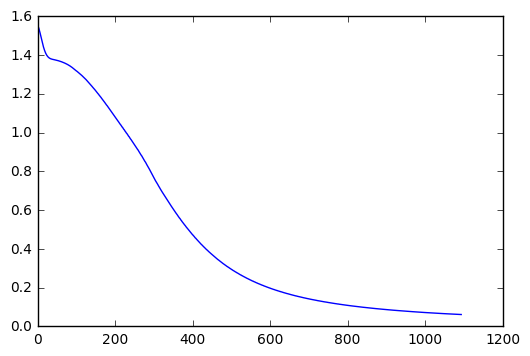

In [24]:
x = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])
X_train, X_test = x, x
y_train, y_test = y, y

mlp = MLPClassifier(hidden_layer_sizes=(3),# 隠れ層のニューロンの数を３個に
                    activation='relu',
                    max_iter=10000,
                    alpha=0,
                    solver='sgd', 
                    verbose=0,
                    learning_rate_init=0.01)

mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

plt.plot(mlp.loss_curve_)
plt.show()

**「Training set score」と「Test set score」の出力がそれぞれ「１」**になったことを確認したら次のセルを実行し、出力を確認しましょう。

In [25]:
W1 = mlp.coefs_[0]
b1 = mlp.intercepts_[0]
W2 = mlp.coefs_[1]
b2 = mlp.intercepts_[1]

#　フォワードプロパゲーション１
#入力
x = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])

#隠れ層
layer1_z = np.dot(x, W1) + b1
layer1_a = relu(layer1_z)          # relu Activation

#出力
layer2_z = np.dot(layer1_a, W2) + b2
layer2_a = softmax(layer2_z)       # softmax

print(layer2_a)

[[9.99711892e-01 2.88107700e-04]
 [9.99846689e-01 1.53310740e-04]
 [7.73871160e-03 9.92261288e-01]
 [7.23177477e-05 9.99927682e-01]]


出力（layer2_a）の状態を可視化してみましょう。

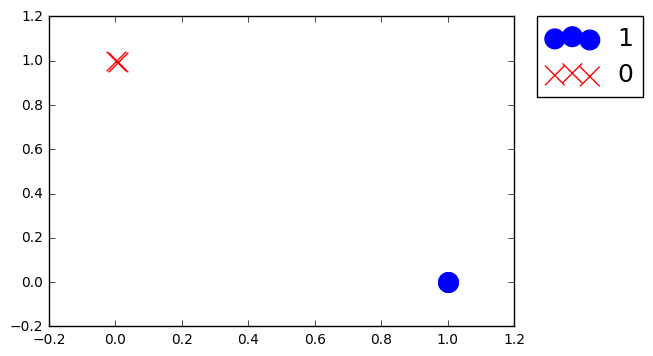

In [26]:
plt.scatter(layer2_a[0][0], layer2_a[0][1], s=200, color='blue',  marker='o', label='1')
plt.scatter(layer2_a[1][0], layer2_a[1][1], s=200, color='blue', marker='o')
plt.scatter(layer2_a[2][0], layer2_a[2][1], s=200, color='red', marker='x',  label='0')
plt.scatter(layer2_a[3][0], layer2_a[3][1], s=200, color='red', marker='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.show()

隱れ層(layer1_a)の出力を確認してみましょう。

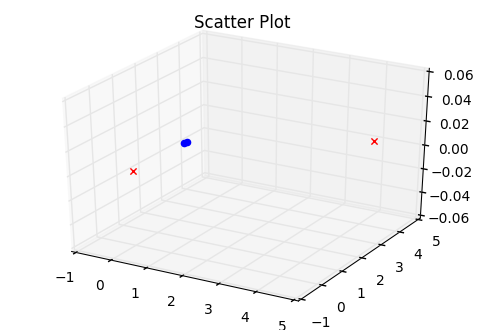

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
layer1_a
ax.scatter3D(layer1_a[0][0], layer1_a[0][1], layer1_a[0][2], color='blue',  marker='o')
ax.scatter3D(layer1_a[1][0], layer1_a[1][1], layer1_a[1][2], color='blue',  marker='o')
ax.scatter3D(layer1_a[2][0], layer1_a[2][1], layer1_a[2][2], color='red', marker='x')
ax.scatter3D(layer1_a[3][0], layer1_a[3][1], layer1_a[3][2], color='red', marker='x')
ax.set_title("Scatter Plot")
plt.show()

## 活性化関数を変えてみる
ここまでは隠れ層の活性化関数をrelu関数を用いてきました。

ここではrelu関数以外の活性化関数を用いて同じ問題を解いてみましょう。

MLPClassifierの利用方法をマニュアルを確認すると、活性化関数として利用できる関数は４つあります。

「 identity 」「 logistic 」「 tanh 」「 relu 」のいずれかになります。

- [sklearn.neural_network.MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

この中で「 relu 」以外で、何度か繰り返せば結果が「Training set score: 1.000000」となる活性化関数は何かを見つけてください。

隠れ層のニューロンの個数が２のままとします。

Training set score: 0.500000
Test set score: 0.500000


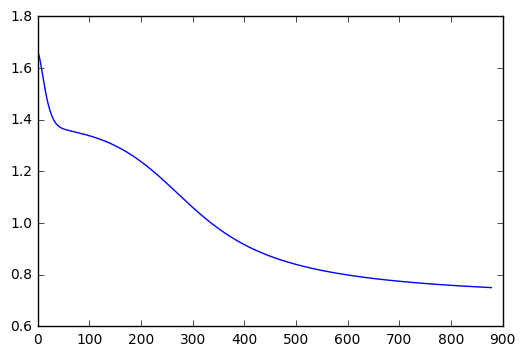

In [28]:
x = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])
X_train, X_test = x, x
y_train, y_test = y, y

mlp = MLPClassifier(hidden_layer_sizes=(2),
                    activation='tanh',
                    max_iter=10000,
                    alpha=0,
                    solver='sgd',
                    verbose=0,
                    learning_rate_init=0.01)

mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

plt.plot(mlp.loss_curve_)
plt.show()

活性化関数になにを選ぶかによって学習結果や学習スピードに大きな違いが出ることが理解できたと思います。